# Has the implementation of Vision Zero in Toronto reduced the rate of motor vehicle collisions resulting in individuals being killed or seriously injured?

# Introduction
<br>

Driving is dangerous - especially in big cities like Toronto. In 2017, the city implemented the Vision Zero initiative, which aims to reduce motor vehicle fatalities to zero. Pioneered in Sweden in the late 1990's, Toronto adopted Vision Zero to deal with it's increasing problem concerning driving fatalities and collisions involving pedestrians and cyclists. 

Since it's implementation in 2017, there have been criticisms of the project - saying it has not been effective. Therefore, this project will aim to answer the question; has the implementation of Vision Zero reduced the rate of MVC resulting in death or serious injuries?

<br>
<br>

MVC_individuals = every person involved is a record - repeat event # <br>
MVC_ events = every event is a record - NO repeat event #

1. Exploratory Data Analysis

2. Location Analysis
    a. Most Common Area?
    b. Most Common Road Type/Environment?
    c. Interactions between smaller vehicles & larger vehicles
    
3. Conditions Analysis
    a. Light
    b. Road Condition
    c. Visibility
    d. Type of Impact
    e. Most likely individual type to be KSI - driver, passenger, bicycle, motorcycle
    
4. Causes/Driver Action Analysis
    a. Speeding
    b. Agression
    c. Alcohol
    d. Red Light
    c. Medical/Disability
    e. Driver Age
    
5. Statistical significance to results? Is the observed data due to chance, or some other factor?

6. Principal Component Analysis - which variables contain the most predictive value?

7. Machine Learning Prediction Model...

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mvc = pd.read_csv('Killed_and_Seriously_Injured.csv',low_memory=False)

In [71]:
mvc.head()

,X,Y,OBJECTID,INDEX_,ACCNUM,DATE,TIME,STREET1,STREET2,OFFSET,...,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION
0,635468.3685,4.839881e+06,1,3389067,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55
1,635468.3685,4.839881e+06,2,3389068,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55
2,635468.3685,4.839881e+06,3,3389069,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55
3,635468.3685,4.839881e+06,4,3389070,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55
4,635468.3685,4.839881e+06,5,3389071,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55


In [78]:
mvc = mvc[[
 'ACCNUM',
 'DATE',
 'TIME',
 'STREET1',
 'STREET2',
 'OFFSET',
 'ROAD_CLASS',
 'DISTRICT', 
'NEIGHBOURHOOD_158',
 'ACCLOC',
 'TRAFFCTL',
 'VISIBILITY',
 'LIGHT',
 'RDSFCOND',
 'ACCLASS',
 'IMPACTYPE',
'INVTYPE',
 'INVAGE',
 'INJURY',
 'VEHTYPE',
 'MANOEUVER',
 'DRIVACT',
 'DRIVCOND',
 'PEDTYPE',
 'PEDACT',
 'PEDCOND',
 'CYCLISTYPE',
 'CYCACT',
 'CYCCOND',
 'PEDESTRIAN',
 'CYCLIST',
 'AUTOMOBILE',
 'MOTORCYCLE',
 'TRUCK',
 'TRSN_CITY_VEH',
 'EMERG_VEH',
 'SPEEDING',
 'AG_DRIV',
 'REDLIGHT',
 'ALCOHOL',
 'DISABILITY']]

In [79]:
mvc.rename(columns = {
 'ACCNUM':'event',
 'DATE':'date',
 'TIME':'time',
 'STREET1':'street_1',
 'STREET2':'street_2',
 'OFFSET':'street_offset',
 'ROAD_CLASS':'road_class',
 'DISTRICT':'district', 
'NEIGHBOURHOOD_158':'neighbourhood',
 'ACCLOC':'location',
 'TRAFFCTL':'traffic_control',
 'VISIBILITY':'visibility',
 'LIGHT':'light',
 'RDSFCOND':'road_condition',
 'ACCLASS':'classification',
 'IMPACTYPE':'impact',
 'INVTYPE':'involvement',
 'INVAGE':'age',
 'INJURY':'injury',
 'VEHTYPE':'vehicle',
 'MANOEUVER':'manoeuver',
 'DRIVACT':'driver_action',
 'DRIVCOND':'driver_condition',
 'PEDTYPE':'ped_crash_type',
 'PEDACT':'ped_action',
 'PEDCOND':'ped_condition',
 'CYCLISTYPE':'cycle_crash_type',
 'CYCACT':'cycle_action',
 'CYCCOND':'cycle_condition',
 'PEDESTRIAN':'involved_ped',
 'CYCLIST':'involved_cycle',
 'AUTOMOBILE':'involved_car',
 'MOTORCYCLE':'involved_moto',
 'TRUCK':'involved_truck',
 'TRSN_CITY_VEH':'involved_transit_city',
 'EMERG_VEH':'involved_emerg',
 'SPEEDING':'speeding',
 'AG_DRIV':'aggresive_distracted',
 'REDLIGHT':'redlight',
 'ALCOHOL':'alcohol',
 'DISABILITY':'medical_disability'}, inplace=True)
mvc.head()

,event,date,time,street_1,street_2,street_offset,road_class,district,neighbourhood,location,...,involved_car,involved_moto,involved_truck,involved_transit_city,involved_emerg,speeding,aggresive_distracted,redlight,alcohol,medical_disability
0,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Woodbine-Lumsden,Intersection Related,...,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN
1,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Woodbine-Lumsden,Intersection Related,...,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN
2,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Woodbine-Lumsden,Intersection Related,...,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN
3,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Woodbine-Lumsden,Intersection Related,...,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN
4,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Woodbine-Lumsden,Intersection Related,...,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN


In [83]:
mvc['date'] = pd.to_datetime(mvc['date'])
mvc['year'], mvc['month'], mvc['day'] = mvc['date'].dt.year, mvc['date'].dt.month, mvc['date'].dt.day
mvc.drop(columns = ['date'], inplace = True)

In [84]:
mvc.head()

,event,time,street_1,street_2,street_offset,road_class,district,neighbourhood,location,traffic_control,...,involved_transit_city,involved_emerg,speeding,aggresive_distracted,redlight,alcohol,medical_disability,year,month,day
0,893184.0,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Woodbine-Lumsden,Intersection Related,No Control,...,NaN,NaN,Yes,Yes,NaN,Yes,NaN,2006,1,1
1,893184.0,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Woodbine-Lumsden,Intersection Related,No Control,...,NaN,NaN,Yes,Yes,NaN,Yes,NaN,2006,1,1
2,893184.0,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Woodbine-Lumsden,Intersection Related,No Control,...,NaN,NaN,Yes,Yes,NaN,Yes,NaN,2006,1,1
3,893184.0,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Woodbine-Lumsden,Intersection Related,No Control,...,NaN,NaN,Yes,Yes,NaN,Yes,NaN,2006,1,1
4,893184.0,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Woodbine-Lumsden,Intersection Related,No Control,...,NaN,NaN,Yes,Yes,NaN,Yes,NaN,2006,1,1


In [85]:
mvc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18957 entries, 0 to 18956
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   event                  14027 non-null  float64
 1   time                   18957 non-null  int64  
 2   street_1               18957 non-null  object 
 3   street_2               17251 non-null  object 
 4   street_offset          3820 non-null   object 
 5   road_class             18471 non-null  object 
 6   district               18728 non-null  object 
 7   neighbourhood          18957 non-null  object 
 8   location               13501 non-null  object 
 9   traffic_control        18882 non-null  object 
 10  visibility             18933 non-null  object 
 11  light                  18953 non-null  object 
 12  road_condition         18928 non-null  object 
 13  classification         18956 non-null  object 
 14  impact                 18930 non-null  object 
 15  in

In [87]:
mvc.event = mvc.event.astype('object')

In [97]:
mvc.describe(include='all')

,event,time,street_1,street_2,street_offset,road_class,district,neighbourhood,location,traffic_control,...,involved_transit_city,involved_emerg,speeding,aggresive_distracted,redlight,alcohol,medical_disability,year,month,day
count,14027.0,18957.000000,18957,17251,3820,18471,18728,18957,13501,18882,...,1148,49,2694,9836,1577,808,493,18957.000000,18957.000000,18957.000000
unique,4955.0,NaN,1942,2822,494,11,4,159,10,10,...,1,1,1,1,1,1,1,NaN,NaN,NaN
top,1311498.0,NaN,YONGE ST,BATHURST ST,10 m West of,Major Arterial,Toronto and East York,West Humber-Clairville,At Intersection,No Control,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN
freq,19.0,NaN,403,156,61,13376,6328,597,8774,9021,...,1148,49,2694,9836,1577,808,493,NaN,NaN,NaN
mean,NaN,1364.956428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.334441,6.848024,15.609537
std,NaN,631.310388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.050680,3.271795,8.862820
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.000000,1.000000,1.000000
25%,NaN,924.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.000000,4.000000,8.000000
50%,NaN,1450.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,7.000000,16.000000
75%,NaN,1852.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,10.000000,23.000000


### The original dataset contains a record for every individual involved in a collision. Here I will create a data frame that contains only unique EVENTS.

In [104]:
mvc_events = mvc[['event', 
                  'year', 
                  'month', 
                  'day', 
                  'time', 
                  'street_1', 
                  'street_2', 
                  'street_offset', 
                  'road_class', 
                  'district', 
                  'neighbourhood', 
                  'location', 
                  'traffic_control', 
                  'visibility', 
                  'light', 
                  'road_condition', 
                  'classification', 
                  'impact', 
                  'involved_ped',
                  'involved_cycle', 
                  'involved_car',
                  'involved_moto',
                  'involved_truck',
                  'involved_transit_city',
                  'involved_emerg',
                  'speeding',
                  'aggresive_distracted',
                  'redlight',
                  'alcohol',
                  'medical_disability']]
mvc_events.head()

,event,year,month,day,time,street_1,street_2,street_offset,road_class,district,...,involved_car,involved_moto,involved_truck,involved_transit_city,involved_emerg,speeding,aggresive_distracted,redlight,alcohol,medical_disability
0,893184.0,2006,1,1,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,...,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN
1,893184.0,2006,1,1,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,...,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN
2,893184.0,2006,1,1,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,...,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN
3,893184.0,2006,1,1,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,...,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN
4,893184.0,2006,1,1,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,...,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN


In [112]:
mvc_events.duplicated(subset=['year', 'month', 'day', 'time', 'street_1']).value_counts()

True     12097
False     6860
dtype: int64

In [160]:
mvc_events = mvc_events.drop_duplicates(subset=['year', 'month', 'day', 'time', 'street_1']).reset_index(drop=True)

### Here I am creating a data frame of each individual involved in a collision without the location data

In [122]:
mvc_individuals = mvc[['event',
                       'year',
                       'month',
                       'day',
                       'time',
                       'street_1',
                       'involvement',
                       'age',
                       'injury',
                       'vehicle',
                       'manoeuver', 
                       'driver_action', 
                       'driver_condition', 
                       'ped_crash_type',
                       'ped_action',
                       'ped_condition',
                       'cycle_crash_type',
                       'cycle_action',
                       'cycle_condition',]]
mvc_individuals.head()

,event,year,month,day,time,street_1,involvement,age,injury,vehicle,manoeuver,driver_action,driver_condition,ped_crash_type,ped_action,ped_condition,cycle_crash_type,cycle_action,cycle_condition
0,893184.0,2006,1,1,236,WOODBINE AVE,Passenger,50 to 54,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,893184.0,2006,1,1,236,WOODBINE AVE,Passenger,15 to 19,Minor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,893184.0,2006,1,1,236,WOODBINE AVE,Driver,55 to 59,Minor,"Automobile, Station Wagon",Going Ahead,Driving Properly,Normal,NaN,NaN,NaN,NaN,NaN,NaN
3,893184.0,2006,1,1,236,WOODBINE AVE,Passenger,20 to 24,Minor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,893184.0,2006,1,1,236,WOODBINE AVE,Passenger,15 to 19,Minor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

In [161]:
mvc_events.head(10)

,event,year,month,day,time,street_1,street_2,street_offset,road_class,district,...,involved_car,involved_moto,involved_truck,involved_transit_city,involved_emerg,speeding,aggresive_distracted,redlight,alcohol,medical_disability
0,893184.0,2006,1,1,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,...,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN
1,909646.0,2006,1,1,315,DANFORTH AVE,WEST LYNN AVE,NaN,Major Arterial,Toronto and East York,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,884090.0,2006,1,2,705,BATHURST ST,DUNDAS ST W,60 NORTH OF,Major Arterial,Toronto and East York,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,885782.0,2006,1,4,1940,DUFFERIN ST,SYLVAN AVE,NaN,Major Arterial,Toronto and East York,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,882079.0,2006,1,6,2210,DON MILLS RD,LEITH HILL RD,NaN,Major Arterial,North York,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,882024.0,2006,1,7,2325,STEELES AVE E,NINTH LINE ST,NaN,Minor Arterial,Scarborough,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,887568.0,2006,1,8,1507,PARLIAMENT ST,FRONT ST E,NaN,Minor Arterial,Toronto and East York,...,Yes,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN
7,882497.0,2006,1,8,1828,ISLINGTON AVE,GOLFDOWN DR,NaN,Major Arterial,Etobicoke York,...,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN
8,882174.0,2006,1,9,1435,KENNEDY RD,GLAMORGAN AVE,NaN,Major Arterial,Scarborough,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,886039.0,2006,1,9,1820,FINCH AVE E,MIDDLEFIELD RD,NaN,Major Arterial,Scarborough,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN


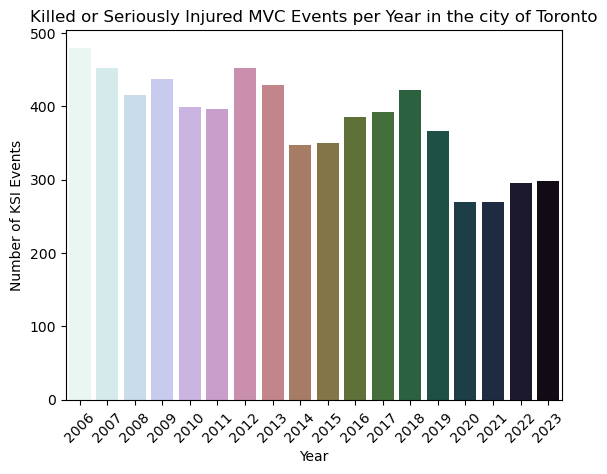

In [162]:
sns.countplot(data=mvc_events, x='year', palette='cubehelix_r')
ax = plt.subplot()
ax.set_xticklabels(list(range(2006,2024)), rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of KSI Events')
plt.title('Killed or Seriously Injured MVC Events per Year in the city of Toronto')
plt.show()
plt.clf()

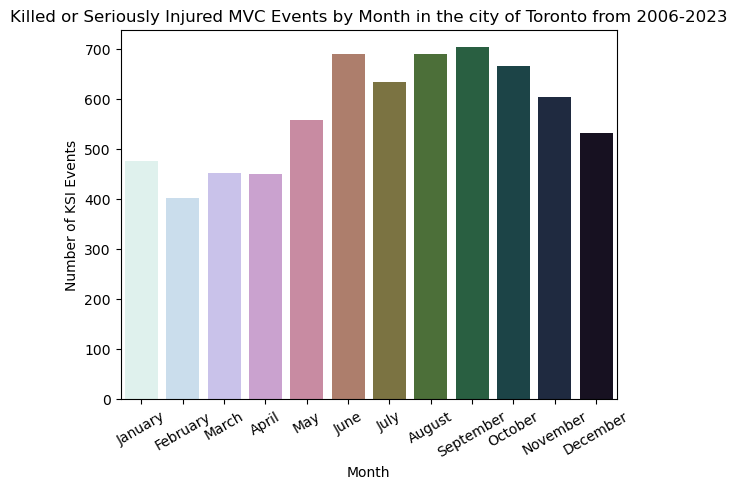

<Figure size 640x480 with 0 Axes>

In [181]:
sns.countplot(data=mvc_events, x='month', palette='cubehelix_r')
ax = plt.subplot()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax.set_xticklabels(months, rotation=30)
plt.xlabel('Month')
plt.ylabel('Number of KSI Events')
plt.title('Killed or Seriously Injured MVC Events by Month in the city of Toronto from 2006-2023')
plt.show()
plt.clf()